In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [6]:
file_names = []
for root, dirs, files in os.walk('../tb_files/Bert/MC-V2-ALL/for-chart'):
    for fname in files:
        full_fname = os.path.join(root, fname)
        file_names.append({'loc':full_fname, 'type':fname})

In [7]:
file_names[0]['type']

'090k_all'

In [8]:
#event_path = 'tb_files/MC-V1-2018/steps-090k/events.out.tfevents.1573531925.5cae4c63838d'

In [9]:
datas = []
step, loss, eval_acc = None, None, None
for file_name in file_names:
    for event in tf.train.summary_iterator(file_name['loc']):
        for value in event.summary.value:
            if value.tag == 'eval_acc':
                if value.HasField('simple_value'):
                    step = event.step
                    eval_acc = value.simple_value
            if value.tag == 'loss':
                if value.HasField('simple_value'):
                    loss = value.simple_value
            
            if step != None and loss != None and eval_acc != None:
                datas.append({'type':file_name['type'], 'step':step, 'loss':loss, 'eval_acc':eval_acc})
                step, loss, eval_acc = None, None, None

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [10]:
len(datas)

222

In [11]:
df = pd.DataFrame(datas)

In [12]:
df.head()

,type,step,loss,eval_acc
0,090k_all,1000,2.753757,0.2215
1,090k_all,2000,2.193141,0.5122
2,090k_all,3000,1.636105,0.5601
3,090k_all,4000,1.450686,0.5752
4,090k_all,5000,1.397745,0.5844


In [57]:
df2 = df.loc[(df['step'] >= 5000)]

In [55]:
len(df2)

216

In [53]:
df.groupby('type')['eval_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
090k_all,37.0,0.591386,0.065602,0.2215,0.5958,0.6052,0.6132,0.6199
190k_all,37.0,0.593122,0.068223,0.2083,0.6021,0.6105,0.6133,0.6182
230k_all,37.0,0.595719,0.070514,0.1948,0.6011,0.6134,0.6165,0.6213
270k_all,37.0,0.596070,0.070027,0.1988,0.6064,0.6142,0.6172,0.6209
310k_all,37.0,0.599214,0.072387,0.1878,0.6083,0.6162,0.6213,0.6274
380k_all,37.0,0.597146,0.072281,0.1835,0.6047,0.6144,0.6190,0.6212


Text(0, 0.5, 'eval_acc')

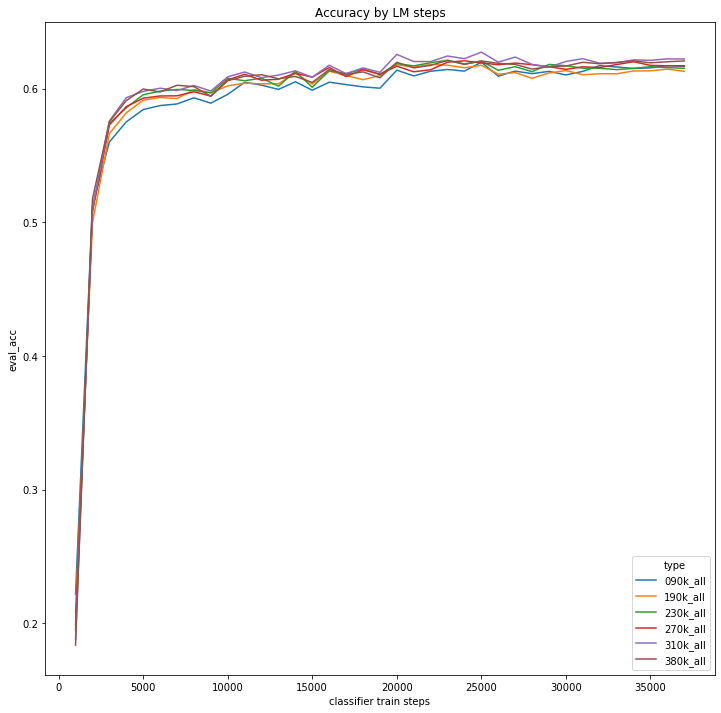

In [14]:
plt.figure(figsize=(12,12))
ax = sns.lineplot(x='step', y='eval_acc', data=df, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'eval_acc')

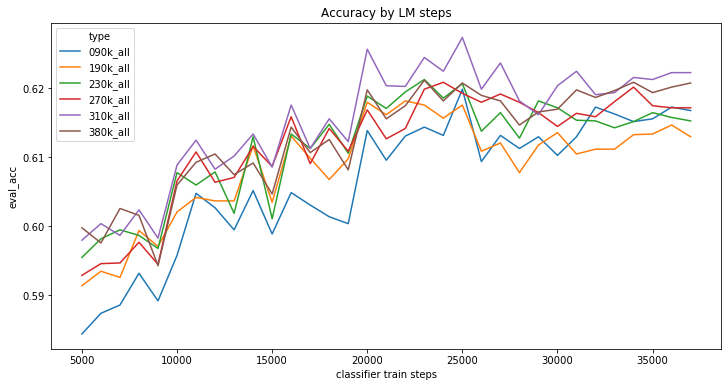

In [60]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='step', y='eval_acc', data=df2, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'eval_acc')

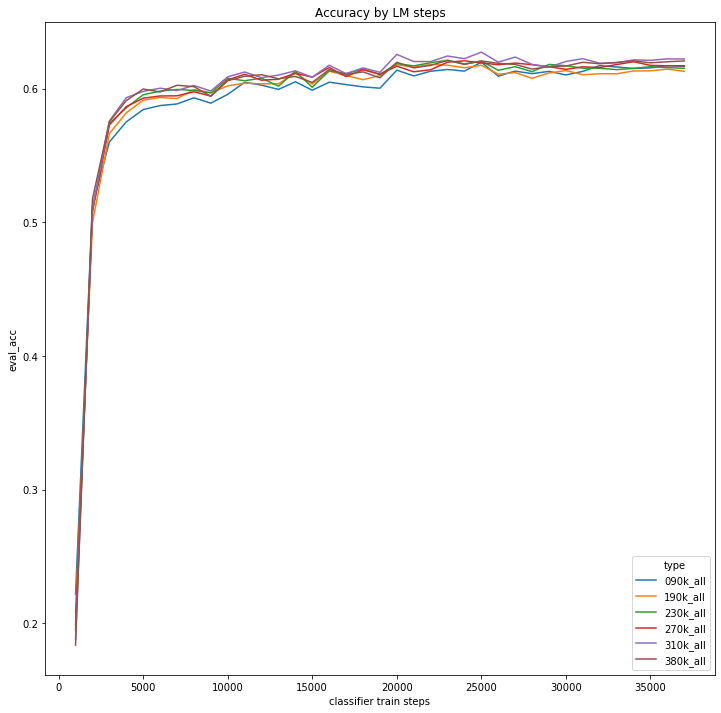

In [14]:
plt.figure(figsize=(12,12))
ax = sns.lineplot(x='step', y='eval_acc', data=df, hue='type')
ax.set_title('Accuracy by LM steps')
plt.xlabel('classifier train steps')
plt.ylabel('eval_acc')

Text(0, 0.5, 'density')

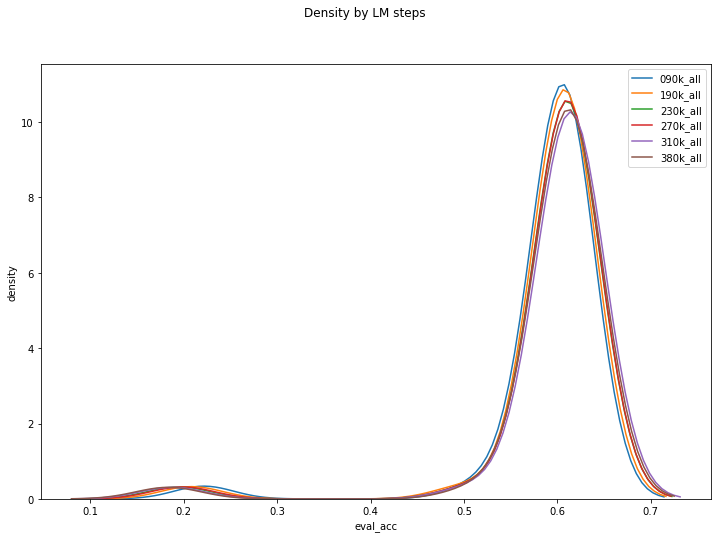

In [12]:
plt.figure(figsize=(12,8))
df.groupby('type')['eval_acc'].apply(lambda x: sns.kdeplot(data=x, legend=True))
plt.suptitle('Density by LM steps')
plt.xlabel('eval_acc')
plt.ylabel('density')

Text(0, 0.5, 'density')

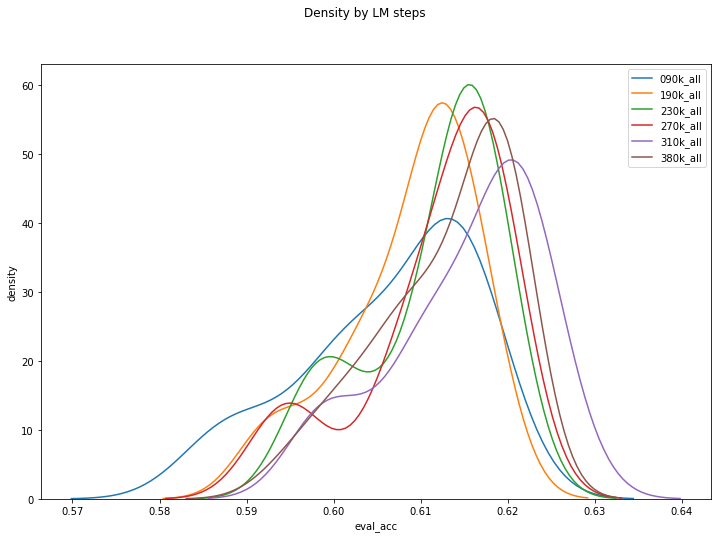

In [62]:
plt.figure(figsize=(12,8))
df2.groupby('type')['eval_acc'].apply(lambda x: sns.kdeplot(data=x, legend=True))
plt.suptitle('Density by LM steps')
plt.xlabel('eval_acc')
plt.ylabel('density')

Text(0.5, 1.0, 'Box-plot by LM steps')

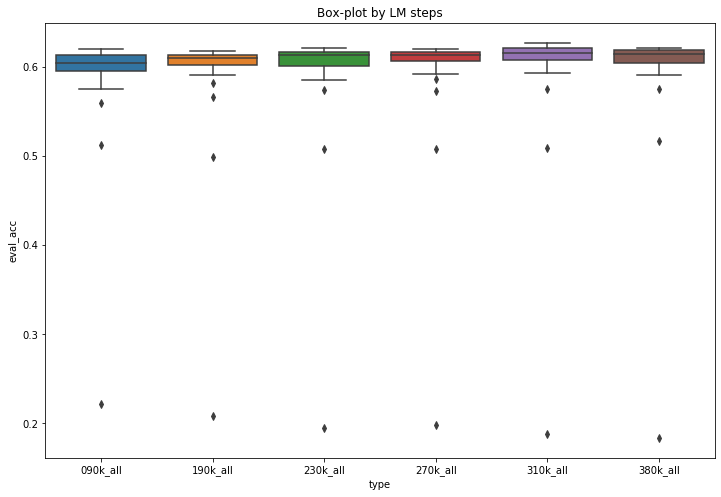

In [13]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='type', y='eval_acc', data=df)
ax.set_title('Box-plot by LM steps')